<center><H1 style = "color: green">GERMAN CREDIT RISK ANALYSIS</H1> </center>

***

## Contents

German Credit Dataset
1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich)
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)


#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Load 'german_credit_data.csv' and store it in a dataframe

In [2]:
df=pd.read_csv('german_credit_data.csv')

#### View top 5 rows

In [3]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Do data analysis with the dataset ( shape of dataset,columns,null objects,unique elements)

#### Shape

In [4]:
df.shape

(1000, 11)

#### Columns

In [5]:
df.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

#### Number of null objects in each column

In [6]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Fill all null objects with 'Unknown'

In [7]:
df.fillna('Unknown',inplace=True)

In [8]:
df.isna().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

#### Unique elements in each column

In [9]:
for i in df:
    print(f"Unique Values in {i} : {df[i].unique()}")

Unique Values in Unnamed: 0 : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 

##### Create a New column Id by replacing unnamed column

In [10]:
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)

In [11]:
df.head()

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,Unknown,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,Unknown,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


#### Find the information of the dataset


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   1000 non-null   object
 6   Checking account  1000 non-null   object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


#### Find basic statistical information about the dataset

In [13]:
df.describe()

,Id,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


#### Fetch the following groupby results

In [14]:
df.groupby(['Sex','Risk','Purpose']).size()

Sex     Risk  Purpose            
female  bad   business                 7
              car                     40
              domestic appliances      2
              education                9
              furniture/equipment     28
              radio/TV                19
              repairs                  2
              vacation/others          2
        good  business                12
              car                     54
              domestic appliances      4
              education               15
              furniture/equipment     46
              radio/TV                66
              repairs                  3
              vacation/others          1
male    bad   business                27
              car                     66
              domestic appliances      2
              education               14
              furniture/equipment     30
              radio/TV                43
              repairs                  6
              vacation/

In [15]:
df.groupby(['Purpose','Sex','Risk']).size()

Purpose              Sex     Risk
business             female  bad       7
                             good     12
                     male    bad      27
                             good     51
car                  female  bad      40
                             good     54
                     male    bad      66
                             good    177
domestic appliances  female  bad       2
                             good      4
                     male    bad       2
                             good      4
education            female  bad       9
                             good     15
                     male    bad      14
                             good     21
furniture/equipment  female  bad      28
                             good     46
                     male    bad      30
                             good     77
radio/TV             female  bad      19
                             good     66
                     male    bad      43
                       

## <span style = "color: orange"> Data Visualization </span>

### Plot the graphs shown below

Text(0, 0.5, 'Total Number of Credit Holders')

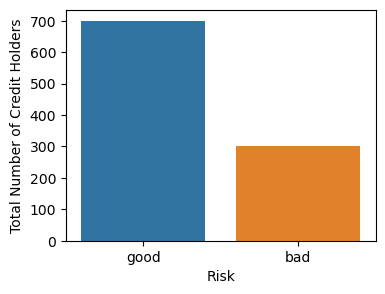

In [16]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Risk')
plt.ylabel('Total Number of Credit Holders')

Text(0, 0.5, 'Total Number of Credit Holders')

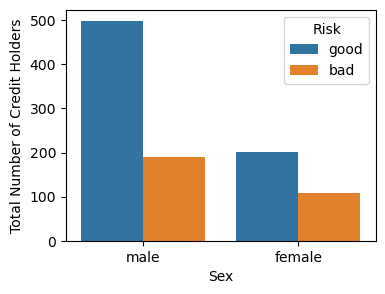

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Sex',hue='Risk')
plt.ylabel('Total Number of Credit Holders')

Text(0, 0.5, 'Total Number of Credit Holders')

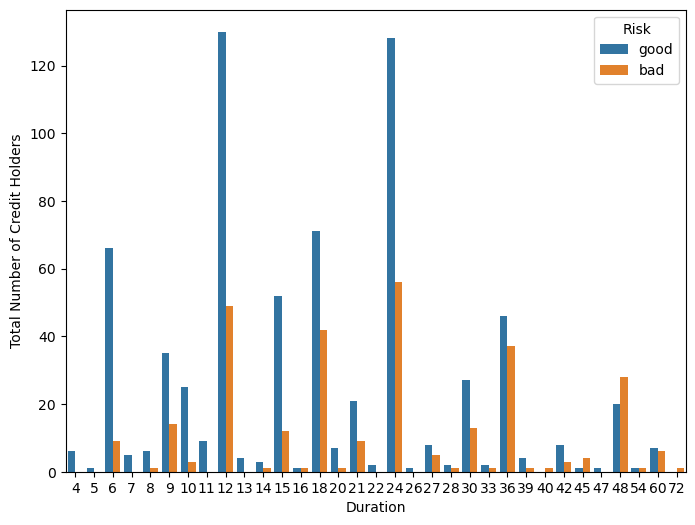

In [18]:
plt.figure(figsize=(8,6))
sns.countplot(data=df,x='Duration',hue='Risk')
plt.ylabel('Total Number of Credit Holders')

Text(0, 0.5, 'Total Number of Credit Holders')

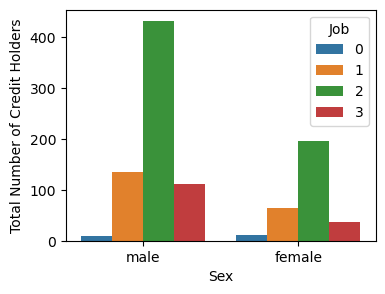

In [19]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Sex',hue='Job')
plt.ylabel('Total Number of Credit Holders')

Text(0, 0.5, 'Total Number of Credit Holders')

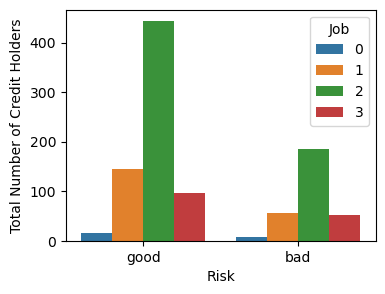

In [20]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Risk',hue='Job')
plt.ylabel('Total Number of Credit Holders')

Text(0, 0.5, 'Total Number of Credit Holders')

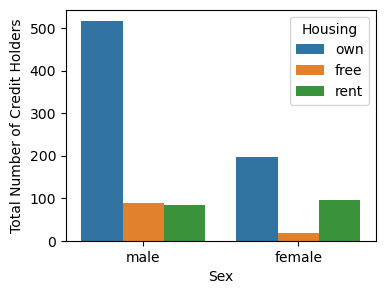

In [21]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Sex',hue='Housing')
plt.ylabel('Total Number of Credit Holders')

<AxesSubplot:xlabel='Risk', ylabel='count'>

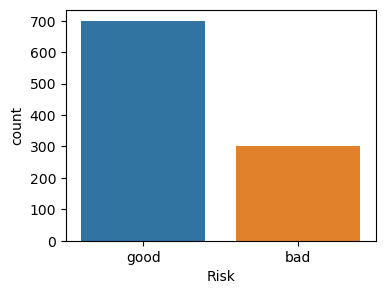

In [26]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x='Risk')

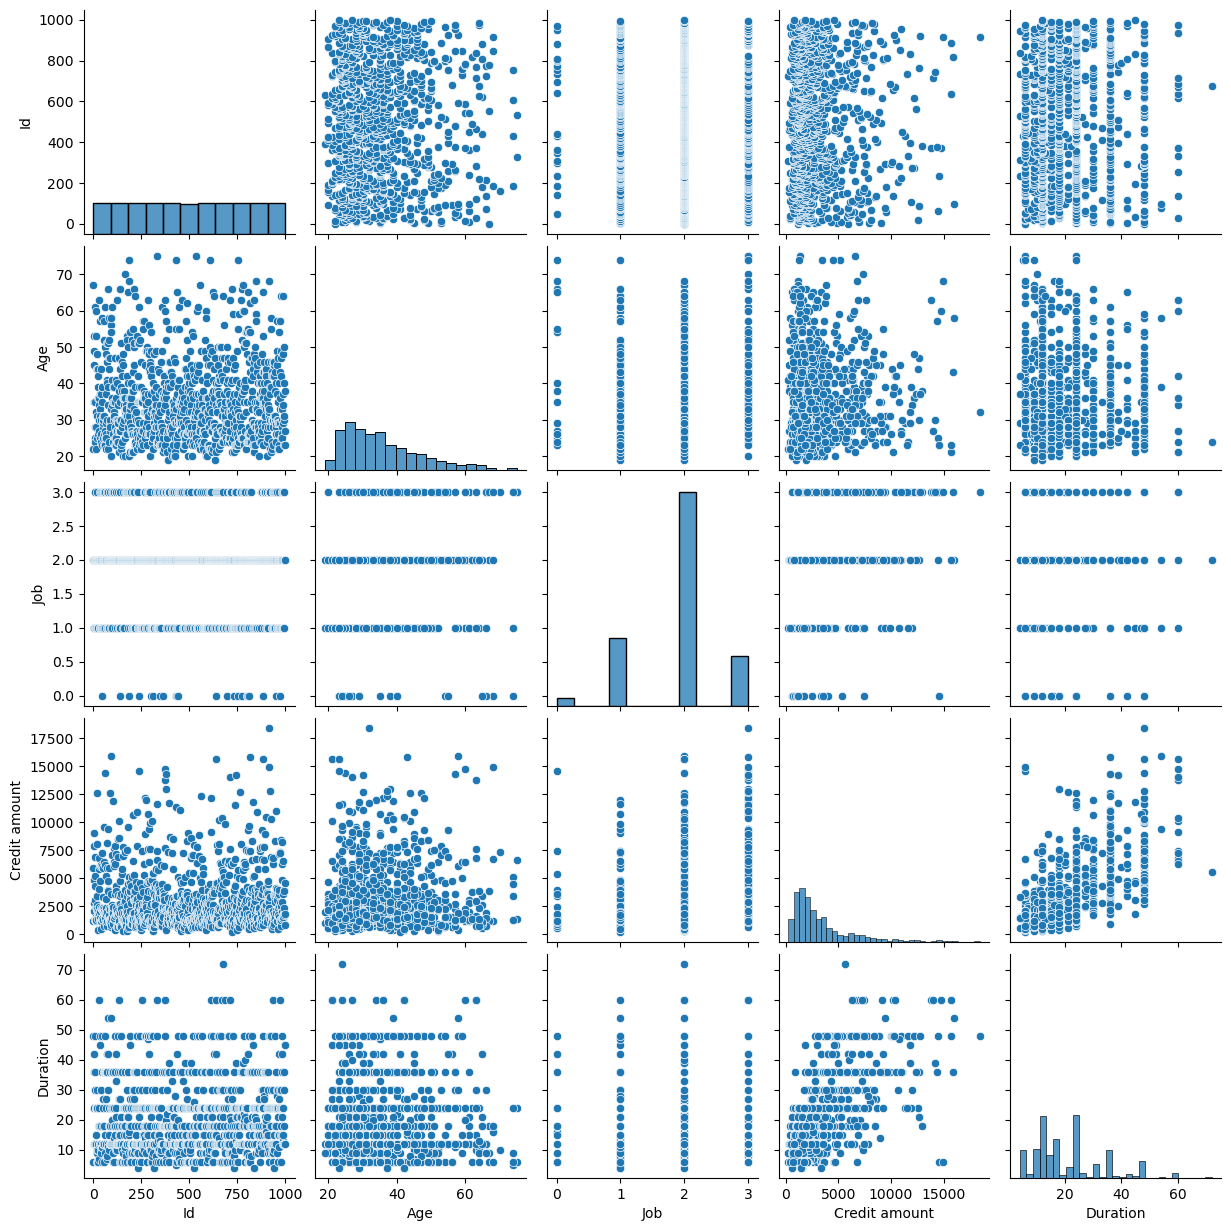

In [22]:
sns.pairplot(data=df)

# Preprocess the dataset:
**We have to convert all categorical values into numerical values.**

#### Convert purpose column using Dummy variables

In [29]:
df=pd.get_dummies(data=df,columns=['Purpose'])

In [32]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,male,2,own,Unknown,little,1169,6,good,0,0,0,0,0,1,0,0


#### Use label encoding for rest of the categorical data

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk']

for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [35]:
df.head(1)

,Id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,1,2,1,0,1,1169,6,1,0,0,0,0,0,1,0,0


### Check the unique values in the new dataframe

In [36]:
for i in df:
    print(f"Unique values in {i}.........{df[i].unique()}")

Unique values in Id.........[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 23

### Plot heatmap

<AxesSubplot:>

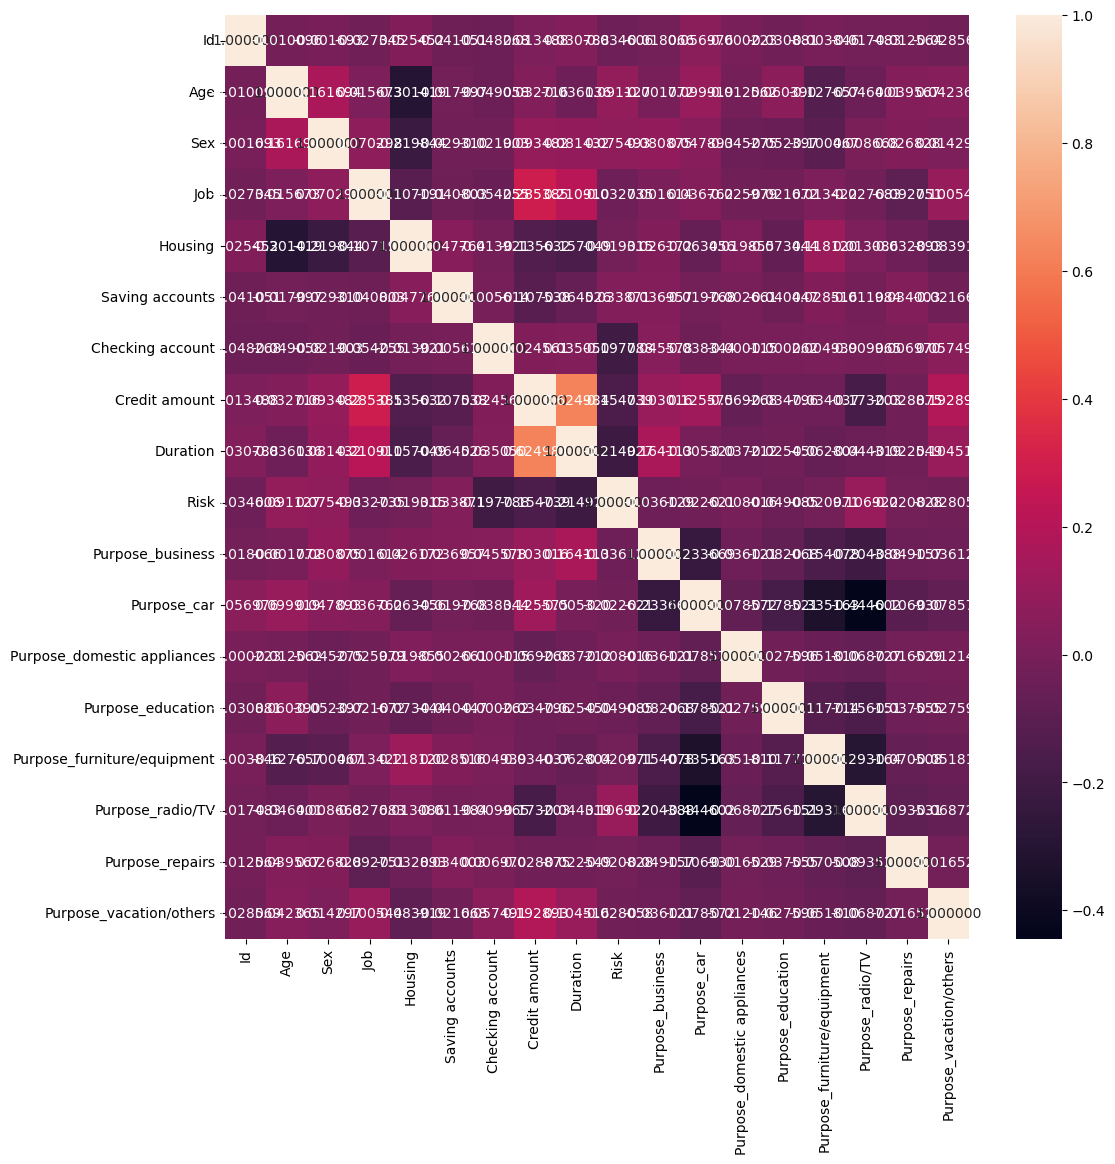

In [42]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,fmt='f')

## Select the Dependent(target) and Independent Variables:

In [43]:
x=df.drop(columns='Risk')
y=df['Risk']

# Standardize the data

In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [46]:
x_scaled=scaler.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)

# Split the data into training and testing set

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Models:

## Random Forest Classifier.
** Let's choose the best estimator and parameters :GridSearchCV**

In [57]:
#let's check what params will be best suitable for random forest classification.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [51]:
grid_forest=GridSearchCV(estimator=RandomForestClassifier(),param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},scoring='accuracy',cv=5)

In [53]:
grid_forest.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [0.5, 1, 5, 10],
                         'n_estimators': [16, 32, 50, 100], 'n_jobs': [1, 2],
                         'random_state': [1, 10, 20, 42]},
             scoring='accuracy')

In [54]:
print(grid_forest.best_estimator_)
print(grid_forest.best_params_)
print(grid_forest.best_score_)

RandomForestClassifier(max_depth=10, n_jobs=1, random_state=1)
{'max_depth': 10, 'n_estimators': 100, 'n_jobs': 1, 'random_state': 1}
0.752


In [55]:
model_forest=RandomForestClassifier(max_depth=10,n_jobs=1,n_estimators=100,random_state=1)

In [56]:
model_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, n_jobs=1, random_state=1)

In [58]:
model_forest.score(x_train,y_train)

0.9626666666666667

In [59]:
cross_val_score(model_forest,x_train,y_train,cv=5,scoring='accuracy').mean()

0.752

In [60]:
y_pred_forest=model_forest.predict(x_test)

### Check the accuracy score, Confusion metrics, Classification report and Cross val score

In [61]:
accuracy_score(y_test,y_pred_forest)

0.724

#### Visualize the confusion matrix

<AxesSubplot:>

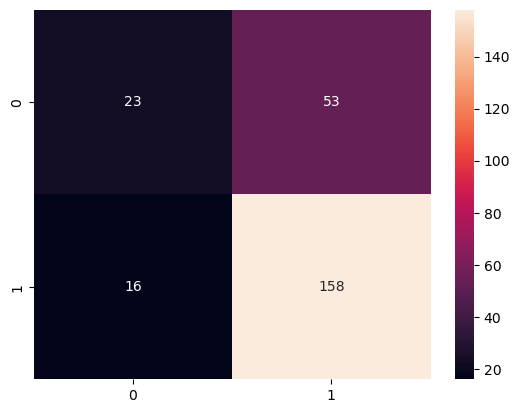

In [62]:
sns.heatmap(confusion_matrix(y_test,y_pred_forest),annot=True,fmt='d')

In [63]:
print(classification_report(y_test,y_pred_forest))

              precision    recall  f1-score   support

           0       0.59      0.30      0.40        76
           1       0.75      0.91      0.82       174

    accuracy                           0.72       250
   macro avg       0.67      0.61      0.61       250
weighted avg       0.70      0.72      0.69       250



## SupportVectorClassifier:

In [64]:
from sklearn.svm import SVC

In [65]:
grid_svc=GridSearchCV(estimator=SVC(),param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},scoring='accuracy')

In [66]:
grid_svc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.75, 0.85, 0.95, 1], 'degree': [3, 4, 5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [67]:
print(grid_svc.best_estimator_)
print(grid_svc.best_params_)
print(grid_svc.best_score_)

SVC(C=1)
{'C': 1, 'degree': 3, 'kernel': 'rbf'}
0.7293333333333333


In [68]:
model_svc=SVC(C=1,degree=3,kernel='rbf')

In [69]:
model_svc.fit(x_train,y_train)

SVC(C=1)

In [70]:
model_svc.score(x_train,y_train)

0.7813333333333333

In [71]:
cross_val_score(model_svc,x_train,y_train,cv=5,scoring='accuracy').mean()

0.7293333333333333

In [72]:
y_pred_svc=model_svc.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred_svc)

0.704

<AxesSubplot:>

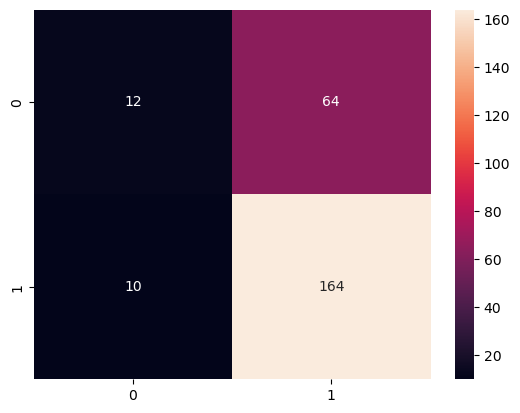

In [74]:
sns.heatmap(confusion_matrix(y_test,y_pred_svc),annot=True,fmt='d')

## LogisticRegression

In [88]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()
model_log.fit(x_train,y_train)
print(cross_val_score(model_log,x_train,y_train,cv=2).mean())

0.6946666666666667


In [77]:
y_pred_log=model_log.predict(x_test)

In [78]:
accuracy_score(y_test,y_pred_log)

0.696

<AxesSubplot:>

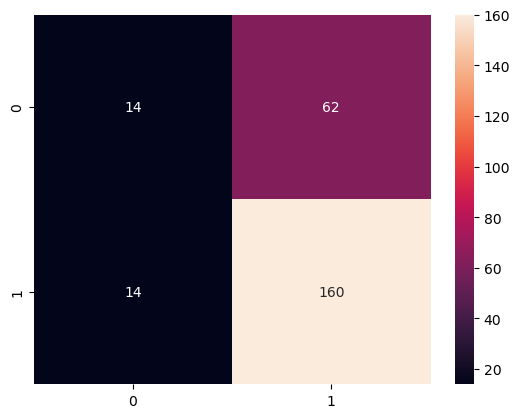

In [79]:
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot=True,fmt='d')

## AdaBoost: Classifier

In [80]:
from sklearn.ensemble import AdaBoostClassifier

In [81]:
model_ada=AdaBoostClassifier(n_estimators=50,random_state=50)

In [82]:
model_ada.fit(x_train,y_train)

AdaBoostClassifier(random_state=50)

In [83]:
model_ada.score(x_train,y_train)

0.7946666666666666

In [107]:
y_pred_ada=model_ada.predict(x_test)

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0])

In [85]:
accuracy_score(y_test,y_pred_ada)

0.736

In [87]:
cross_val_score(model_ada,x_train,y_train,cv=2).mean()

0.6906666666666667

#### View scores of the different models 

In [92]:
models=['Logistic Regression','Random Forest Classification','Support Vector Classification','AdaBoost Classification']
scores=[cross_val_score(model_log,x_train,y_train,cv=5,scoring='accuracy').mean(),cross_val_score(model_forest,x_train,y_train,cv=5,scoring='accuracy').mean(),cross_val_score(model_svc,x_train,y_train,cv=5,scoring='accuracy').mean(),cross_val_score(model_ada,x_train,y_train,cv=5,scoring='accuracy').mean()]

In [93]:
all_scores= pd.DataFrame({'Model': models, 'Score': scores})
all_scores

,Model,Score
0,Logistic Regression,0.690667
1,Random Forest Classification,0.752000
2,Support Vector Classification,0.729333
3,AdaBoost Classification,0.716000


## ANALYZING THE RESULTS

**So now we have to decide which one is the best model, and we have two types of wrong values:**

* False Positive, means they won't pay the loan(Risk:Yes), but the model thinks they will.
* False Negative, means they will pay the loan(Risk:No), but the model said they won't.

**In my opinion:**

* Length of the dataset isn't enough, we need more data for better accuracy.

## PCA to Speed up Machine Learning Algorithms (Logistic Regression)
Step 0: Import and use PCA. After PCA you will apply a machine learning algorithm of your choice to the transformed data

In [96]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(x_train,y_train)

PCA(n_components=10)

In [97]:
pca.n_components_

10

In [98]:
train_x= pca.transform(x_train)
test_x= pca.transform(x_test)

**Step 1: Import the model you want to use**

In sklearn, all machine learning models are implemented as Python classes

In [ ]:
from sklearn.linear_model import LogisticRegression


**Step 2: Make an instance of the Model**

In [99]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
# solver = 'lbfgs'
pca_log= LogisticRegression(solver = 'lbfgs')

In [100]:
pca_log.fit(train_x,y_train)

LogisticRegression()

In [101]:
pca_log.score(train_x,y_train)

0.6973333333333334

In [103]:
cross_val_score(pca_log,train_x,y_train,cv=5,scoring='accuracy').mean()

0.7013333333333334

In [104]:
y_pred_pca=pca_log.predict(test_x)


In [105]:
accuracy_score(y_test,y_pred_pca)

0.696

<AxesSubplot:>

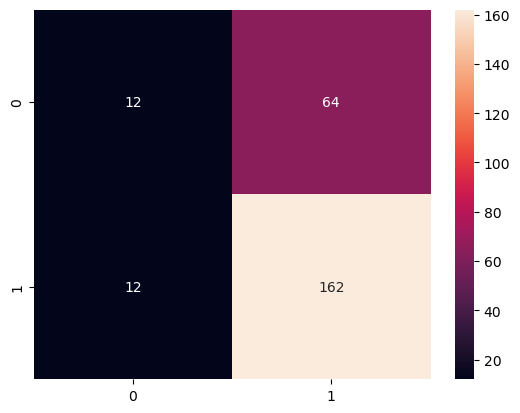

In [106]:
sns.heatmap(confusion_matrix(y_test,y_pred_pca),annot=True,fmt='d')

In [108]:
import joblib
joblib.dump(model_log,'Log Model')

['Log Model']